In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [0]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
nb_classes = 10  

In [0]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32,[None, nb_classes])

W1 = tf.Variable(tf.random_normal([784, nb_classes*10]))
b1 = tf.Variable(tf.random_normal([nb_classes*10]))
layer1 = tf.nn.softmax(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([nb_classes*10,nb_classes]))
b2 = tf.Variable(tf.random_normal([nb_classes]))
hypothesis = tf.nn.softmax(tf.matmul(layer1, W2) + b2)

In [0]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [0]:
is_correct = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [0]:
training_epochs = 15
batch_size = 100

Epoch: 0001  cost =  2.180201341
Epoch: 0002  cost =  1.733948288
Epoch: 0003  cost =  1.489552428
Epoch: 0004  cost =  1.341589554
Epoch: 0005  cost =  1.247048121
Epoch: 0006  cost =  1.167751578
Epoch: 0007  cost =  1.090737498
Epoch: 0008  cost =  1.023980663
Epoch: 0009  cost =  0.969478393
Epoch: 0010  cost =  0.926294666
Epoch: 0011  cost =  0.891404053
Epoch: 0012  cost =  0.861963504
Epoch: 0013  cost =  0.836281840
Epoch: 0014  cost =  0.815738306
Epoch: 0015  cost =  0.797820362
Label: [4]
Prediction: [4]


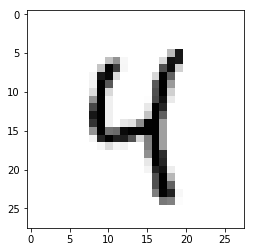

In [0]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(training_epochs):
    avgcost = 0
    totalbatch = int(mnist.train.num_examples / batch_size)
    
    for i in range(totalbatch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      c, _ = sess.run([cost, optimizer], feed_dict = {X: batch_xs, Y: batch_ys})
      avgcost += c /totalbatch
      
    print('Epoch:','%04d' %(epoch + 1),' cost = ','{:.9f}'.format(avgcost))
  r = random.randint(0, mnist.test.num_examples -1)
  print('Label:', sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
  print('Prediction:', sess.run(tf.argmax(hypothesis,1), feed_dict={X: mnist.test.images[r:r+1]}))
  plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap = 'Greys', interpolation = 'nearest')
  plt.show()

In [0]:
#답을 알고 싶다..